<a href="https://colab.research.google.com/github/luleoa12/Lifestyle-Enhanced-AI-for-10-Year-CHD-Risk/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lifestyle-Enhanced AI for 10-Year CHD Risk


## Project Overview

The objective of this project is to apply machine learning techniques to predict 10-year CHD (coronary heart disease) risk using real, de-identified clinical data while allowing interactive, user-driven simulations of lifestyle-related inputs (e.g., smoking status, BMI, blood pressure). These simulations are designed to improve interpretability and educational value by showing how the predictive model responds to changes in modifiable risk factors.


## Environment Setup

In [ ]:
# Install required packages if not already installed
%pip install --quiet numpy pandas matplotlib scikit-learn ipywidgets

# Core Libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Scikit-learn: Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Scikit-learn: Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Evaluation Metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Interactive Components
import ipywidgets as widgets
from IPython.display import display, clear_output

## Data Acquisition

This code loads the Framingham Heart Study dataset from Hugging Face into a Pandas DataFrame.
`df.head()` displays the first five rows so we can verify the data loaded correctly and quickly inspect the features and target variable (`TenYearCHD`) before preprocessing.

In [ ]:
# URL to the publicly hosted Framingham Heart Study dataset (CSV format)
url = "https://huggingface.co/datasets/Nnaodeh/Framingham_Stroke_Datasets/resolve/main/framingham%20Heart%20Study%20Dataset.csv"

# Load the dataset directly from the URL into a pandas DataFrame
df = pd.read_csv(url)

# Display the first 5 rows to verify successful loading
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Data Preprocessing

Key cardiovascular risk factors—including age, sex, smoking status, diabetes, total cholesterol, systolic and diastolic blood pressure, antihypertensive medication use, and BMI—are used to predict the 10-year CHD outcome (`TenYearCHD`). These variables capture both clinical measurements and modifiable lifestyle components that influence long-term cardiovascular risk.

The dataset is divided into an 80% training set and 20% hold-out test set using stratified sampling to maintain class balance. Median imputation addresses missing clinical values, and feature scaling standardizes continuous variables to ensure stable and reliable model training.


In [ ]:
# Features and target
features = [
    'age',
    'male',
    'currentSmoker',
    'diabetes',
    'totChol',
    'sysBP',
    'diaBP',
    'BPMeds',
    'BMI']
target = 'TenYearCHD'

# Prepare input (X) and output (y)
X = df[features]
y = df[target]

# Train-test split (80% train, 20% test, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Impute missing values using median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

print("Data preprocessing completed.")


Data preprocessing completed.


## Model Training

### Logistic Regression

A Logistic Regression model (with increased iterations for convergence stability) is trained on the preprocessed training data. Predicted probabilities for 10-year CHD risk are then generated for the test set, producing continuous risk scores suitable for ROC-AUC evaluation and interactive risk visualization.


In [ ]:
# Initialize and train logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict probabilities of CHD (probability of class 1)
risk_probs = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression model trained and risk probabilities calculated successfully.")

Logistic Regression model trained and risk probabilities calculated successfully.


### Random Forest

A Random Forest classifier is trained on the scaled training data to model nonlinear relationships between cardiovascular risk factors and 10-year CHD outcomes. Predicted probabilities are generated for the test set to enable ROC-AUC comparison with other models.


In [ ]:
# Initialize and train Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict probabilities of CHD (probability of class 1)
rf_risk_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

print("RandomForestClassifier model trained and risk probabilities calculated successfully.")

RandomForestClassifier model trained and risk probabilities calculated successfully.


### Support Vector Machine (SVC)

A Support Vector Classifier (SVC) is trained with probability estimation enabled to model potential nonlinear decision boundaries in CHD risk prediction. Predicted probabilities are computed for the test set to allow threshold-independent evaluation using ROC-AUC.


In [ ]:
# Initialize and train Support Vector Classifier
svc_model = SVC(probability=True, random_state=42)
svc_model.fit(X_train_scaled, y_train)

# Predict probabilities of CHD (probability of class 1)
svc_risk_probs = svc_model.predict_proba(X_test_scaled)[:, 1]


print("SVC model trained and predicted probabilities calculated successfully.")

SVC model trained and predicted probabilities calculated successfully.


### Gradient Boosting Classifier

A Gradient Boosting Classifier is trained to iteratively combine weak decision trees into a stronger predictive model. Predicted probabilities for the test set are generated to compare boosted ensemble performance against other supervised learning approaches using ROC-AUC.


In [ ]:
# Initialize and train Gradient Boosting classifier
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train_scaled, y_train)

# Predict probabilities of CHD (probability of class 1)
gbc_risk_probs = gbc_model.predict_proba(X_test_scaled)[:, 1]

print("GradientBoostingClassifier model trained and predicted probabilities calculated successfully.")

GradientBoostingClassifier model trained and predicted probabilities calculated successfully.


## Model Evaluation

ROC-AUC scores are calculated for each model to evaluate their ability to discriminate between individuals who will experience a 10-year CHD event and those who will not. This threshold-independent metric allows direct comparison of Logistic Regression, Random Forest, SVC, and Gradient Boosting performance on the test set.


In [ ]:
# Compute AUC for all models
auc = roc_auc_score(y_test, risk_probs)         # Logistic Regression
rf_auc = roc_auc_score(y_test, rf_risk_probs)   # Random Forest
svc_auc = roc_auc_score(y_test, svc_risk_probs) # SVC
gbc_auc = roc_auc_score(y_test, gbc_risk_probs) # Gradient Boosting

# Print ROC-AUC scores
print(f"Logistic Regression ROC-AUC: {auc:.4f}")
print(f"Random Forest ROC-AUC: {rf_auc:.4f}")
print(f"SVC ROC-AUC: {svc_auc:.4f}")
print(f"Gradient Boosting ROC-AUC: {gbc_auc:.4f}")

Logistic Regression ROC-AUC: 0.7007
Random Forest ROC-AUC: 0.6450
SVC ROC-AUC: 0.5595
Gradient Boosting ROC-AUC: 0.6858


ROC curves are plotted for all models to visually compare their ability to distinguish between individuals with and without a 10-year CHD event. Each curve is labeled with its ROC-AUC score, and the diagonal line represents a random classifier baseline (AUC = 0.50). This visualization highlights model performance differences and supports selection of the most clinically interpretable and reliable model.


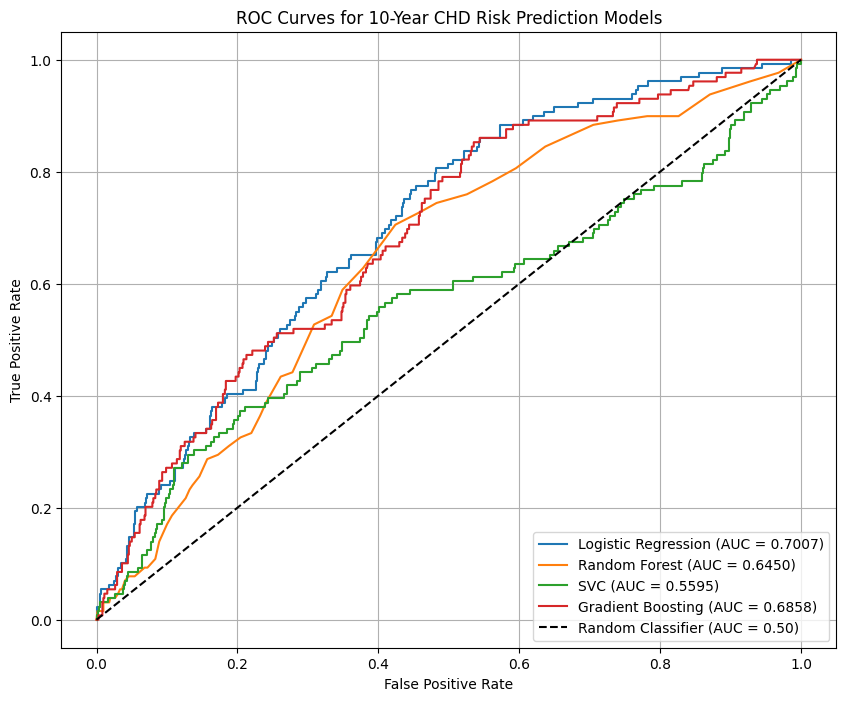

ROC curves for all models plotted for visual comparison.


In [ ]:
# Compute ROC curve values for each model
fpr, tpr, _ = roc_curve(y_test, risk_probs)             # Logistic Regression
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_risk_probs)    # Random Forest
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_risk_probs) # SVC
gbc_fpr, gbc_tpr, _ = roc_curve(y_test, gbc_risk_probs) # Gradient Boosting

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.4f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.4f})")
plt.plot(svc_fpr, svc_tpr, label=f"SVC (AUC = {svc_auc:.4f})")
plt.plot(gbc_fpr, gbc_tpr, label=f"Gradient Boosting (AUC = {gbc_auc:.4f})")

# Diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for 10-Year CHD Risk Prediction Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("ROC curves for all models plotted for visual comparison.")

The final model chosen for this project was Logistic Regression with L2 regularization. This decision was based on several technical considerations that make it uniquely suited for clinical application and the Interactive Risk Simulator.

Beyond achieving the highest ROC-AUC (0.70) on the test set and minimizing overfitting risks in this moderate-sized dataset, the model aligns with major cardiovascular frameworks like the Framingham Risk Score and ASCVD Pooled Cohort Equations, which are fundamentally logistic-based. Most importantly, it supports the additive, stepwise visualization required for lifestyle simulation; this allows the tool to provide stable, probabilistic outputs that clearly communicate how specific changes—like quitting smoking or lowering blood pressure—incrementally reduce a patient's 10-year CHD risk.



## Interactive Risk Simulator

An interactive simulation tool is implemented using widgets to explore how changes in modifiable lifestyle and clinical factors affect 10-year CHD risk. Users can input baseline values (age, sex, smoking status, diabetes, cholesterol, blood pressure, BP medication use, BMI), and the logistic regression model predicts the associated risk.

The tool also simulates sequential interventions and visualizes the cumulative impact on predicted risk using a waterfall-style chart. This approach highlights how individual lifestyle modifications may shift risk estimates and supports interpretability and patient education.


In [ ]:
# Functions to simulate CHD risk
def simulate_risk(age, male, currentSmoker, diabetes, totChol, sysBP, diaBP, BPMeds, BMI):
    """Predict 10-year CHD risk using logistic regression"""
    x = np.array([[age, male, currentSmoker, diabetes, totChol, sysBP, diaBP, BPMeds, BMI]])
    x_scaled = scaler.transform(x)  # scale features using trained scaler
    prob = log_reg.predict_proba(x_scaled)[0, 1]  # probability of CHD
    return prob

def risk_category(prob):
    """Return categorical risk based on predicted probability"""
    if prob < 0.05:
        return "Low risk (<5%)"
    elif prob < 0.075:
        return "Borderline (5-7.4%)"
    elif prob < 0.2:
        return "Intermediate (7.5-19.9%)"
    else:
        return "High risk (≥20%)"

# Widgets for user input
age_widget = widgets.IntText(value=55, description="Age:")
male_widget = widgets.Dropdown(options=[("Male",1),("Female",0)], description="Sex:")
smoker_widget = widgets.Dropdown(options=[("Yes",1),("No",0)], description="Smoker:")
diabetes_widget = widgets.Dropdown(options=[("Yes",1),("No",0)], description="Diabetes:")
chol_widget = widgets.IntText(value=220, description="Total Chol:")
sysbp_widget = widgets.IntText(value=135, description="Systolic BP:")
diabp_widget = widgets.IntText(value=85, description="Diastolic BP:")
meds_widget = widgets.Dropdown(options=[("Yes",1),("No",0)], description="BP Meds:")
bmi_widget = widgets.FloatText(value=28.0, description="BMI:")

output = widgets.Output()

# Button callback to simulate risk and interventions
def on_button_click(b):
    with output:
        clear_output()

        # Collect baseline parameters
        baseline_params = {
            'age': age_widget.value,
            'male': male_widget.value,
            'currentSmoker': smoker_widget.value,
            'diabetes': diabetes_widget.value,
            'totChol': chol_widget.value,
            'sysBP': sysbp_widget.value,
            'diaBP': diabp_widget.value,
            'BPMeds': meds_widget.value,
            'BMI': bmi_widget.value
        }

        # Predict baseline risk
        risk = simulate_risk(**baseline_params)
        print(f"Predicted 10-year CHD risk: {risk*100:.1f}%")
        print("Risk category:", risk_category(risk))

        # Define lifestyle/medical interventions
        interventions = [
            {'label': 'Quit Smoking', 'changes': {'currentSmoker': 0}},
            {'label': 'Control Diabetes', 'changes': {'diabetes': 0}},
            {'label': 'Lower BP', 'changes': {'sysBP': 120, 'diaBP': 80}},
            {'label': 'Improve BMI', 'changes': {'BMI': 24.0}}
        ]

        # Track risk progression for each intervention
        labels = ['Baseline']
        risks = [risk]
        current_params = baseline_params.copy()

        for intervention in interventions:
            labels.append(intervention['label'])
            for key, value in intervention['changes'].items():
                current_params[key] = value
            new_risk = simulate_risk(**current_params)
            risks.append(new_risk)

        # Calculate incremental changes
        changes = [0] + [risks[i] - risks[i-1] for i in range(1, len(risks))]

        # Plot cumulative risk reduction
        fig, ax = plt.subplots(figsize=(10, 6))

        ax.bar(labels[0], risks[0], color='skyblue', width=0.6)
        bottom = risks[0]

        for i in range(1, len(labels)):
            label = labels[i]
            change = changes[i]
            if change < 0:
                ax.bar(label, abs(change), bottom=bottom + change, color='lightcoral', width=0.6)
                ax.plot([i-1-0.3, i-0.3], [bottom, bottom+change], 'k--', linewidth=0.8)
            else:
                ax.bar(label, change, bottom=bottom, color='lightgreen', width=0.6)
                ax.plot([i-1-0.3, i-0.3], [bottom, bottom+change], 'k--', linewidth=0.8)
            bottom += change
            ax.text(i, bottom + 0.005, f'{bottom*100:.1f}%', ha='center', va='bottom', fontsize=9)

        ax.text(0, risks[0] + 0.005, f'{risks[0]*100:.1f}%', ha='center', va='bottom', fontsize=9)
        ax.set_title('Cumulative 10-Year CHD Risk Reduction from Interventions')
        ax.set_ylabel('10-Year CHD Risk Probability')
        ax.set_xlabel('Intervention Steps')
        ax.set_ylim(0, max(risks) * 1.1)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# Display widgets and button
button = widgets.Button(description="Simulate Risk")
button.on_click(on_button_click)

display(age_widget, male_widget, smoker_widget, diabetes_widget,
        chol_widget, sysbp_widget, diabp_widget, meds_widget, bmi_widget,
        button, output)


IntText(value=55, description='Age:')

Dropdown(description='Sex:', options=(('Male', 1), ('Female', 0)), value=1)

Dropdown(description='Smoker:', options=(('Yes', 1), ('No', 0)), value=1)

Dropdown(description='Diabetes:', options=(('Yes', 1), ('No', 0)), value=1)

IntText(value=220, description='Total Chol:')

IntText(value=135, description='Systolic BP:')

IntText(value=85, description='Diastolic BP:')

Dropdown(description='BP Meds:', options=(('Yes', 1), ('No', 0)), value=1)

FloatText(value=28.0, description='BMI:')

Button(description='Simulate Risk', style=ButtonStyle())

Output()